In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import geopandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install pycountry-convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 83.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 24.8 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ae5a7c9b460cdf8762429cc2fbb8f701772870b61a474ac1d4c52a35e83f36f2
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
import pycountry_convert as pc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset energi/global-data-on-sustainable-energy (1).csv")
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
df.shape

(3649, 21)

In [ ]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.104365,0.141820,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,0.104767,-0.192566,0.135399,-0.001629,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,0.058195,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,0.063131,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.104365,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.147768,0.427264,0.000290,-0.056445,0.046755,0.718511,-0.013462,0.017266,0.070355,-0.041691,-0.025587
Financial flows to developing countries (US $),0.141820,0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,0.122362,-0.002716,0.009860,-0.004231,0.126609,-0.023016,0.003324,0.067525,0.141528,0.021782,0.029141
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.768166,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,-0.088586,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.057667,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,0.166374,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,0.782388,-0.015196,0.007945,0.044866,-0.029134,-0.045336


In [ ]:
# Menghitung korelasi antar kolom
corr_matrix = df.corr()
df_csv = pd.DataFrame(corr_matrix)
df_csv.to_csv('/content/drive/MyDrive/dataset energi/korlasi.csv', index =False)

<ipython-input-10-087886417b72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<ipython-input-11-4b6d5f9a8702>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


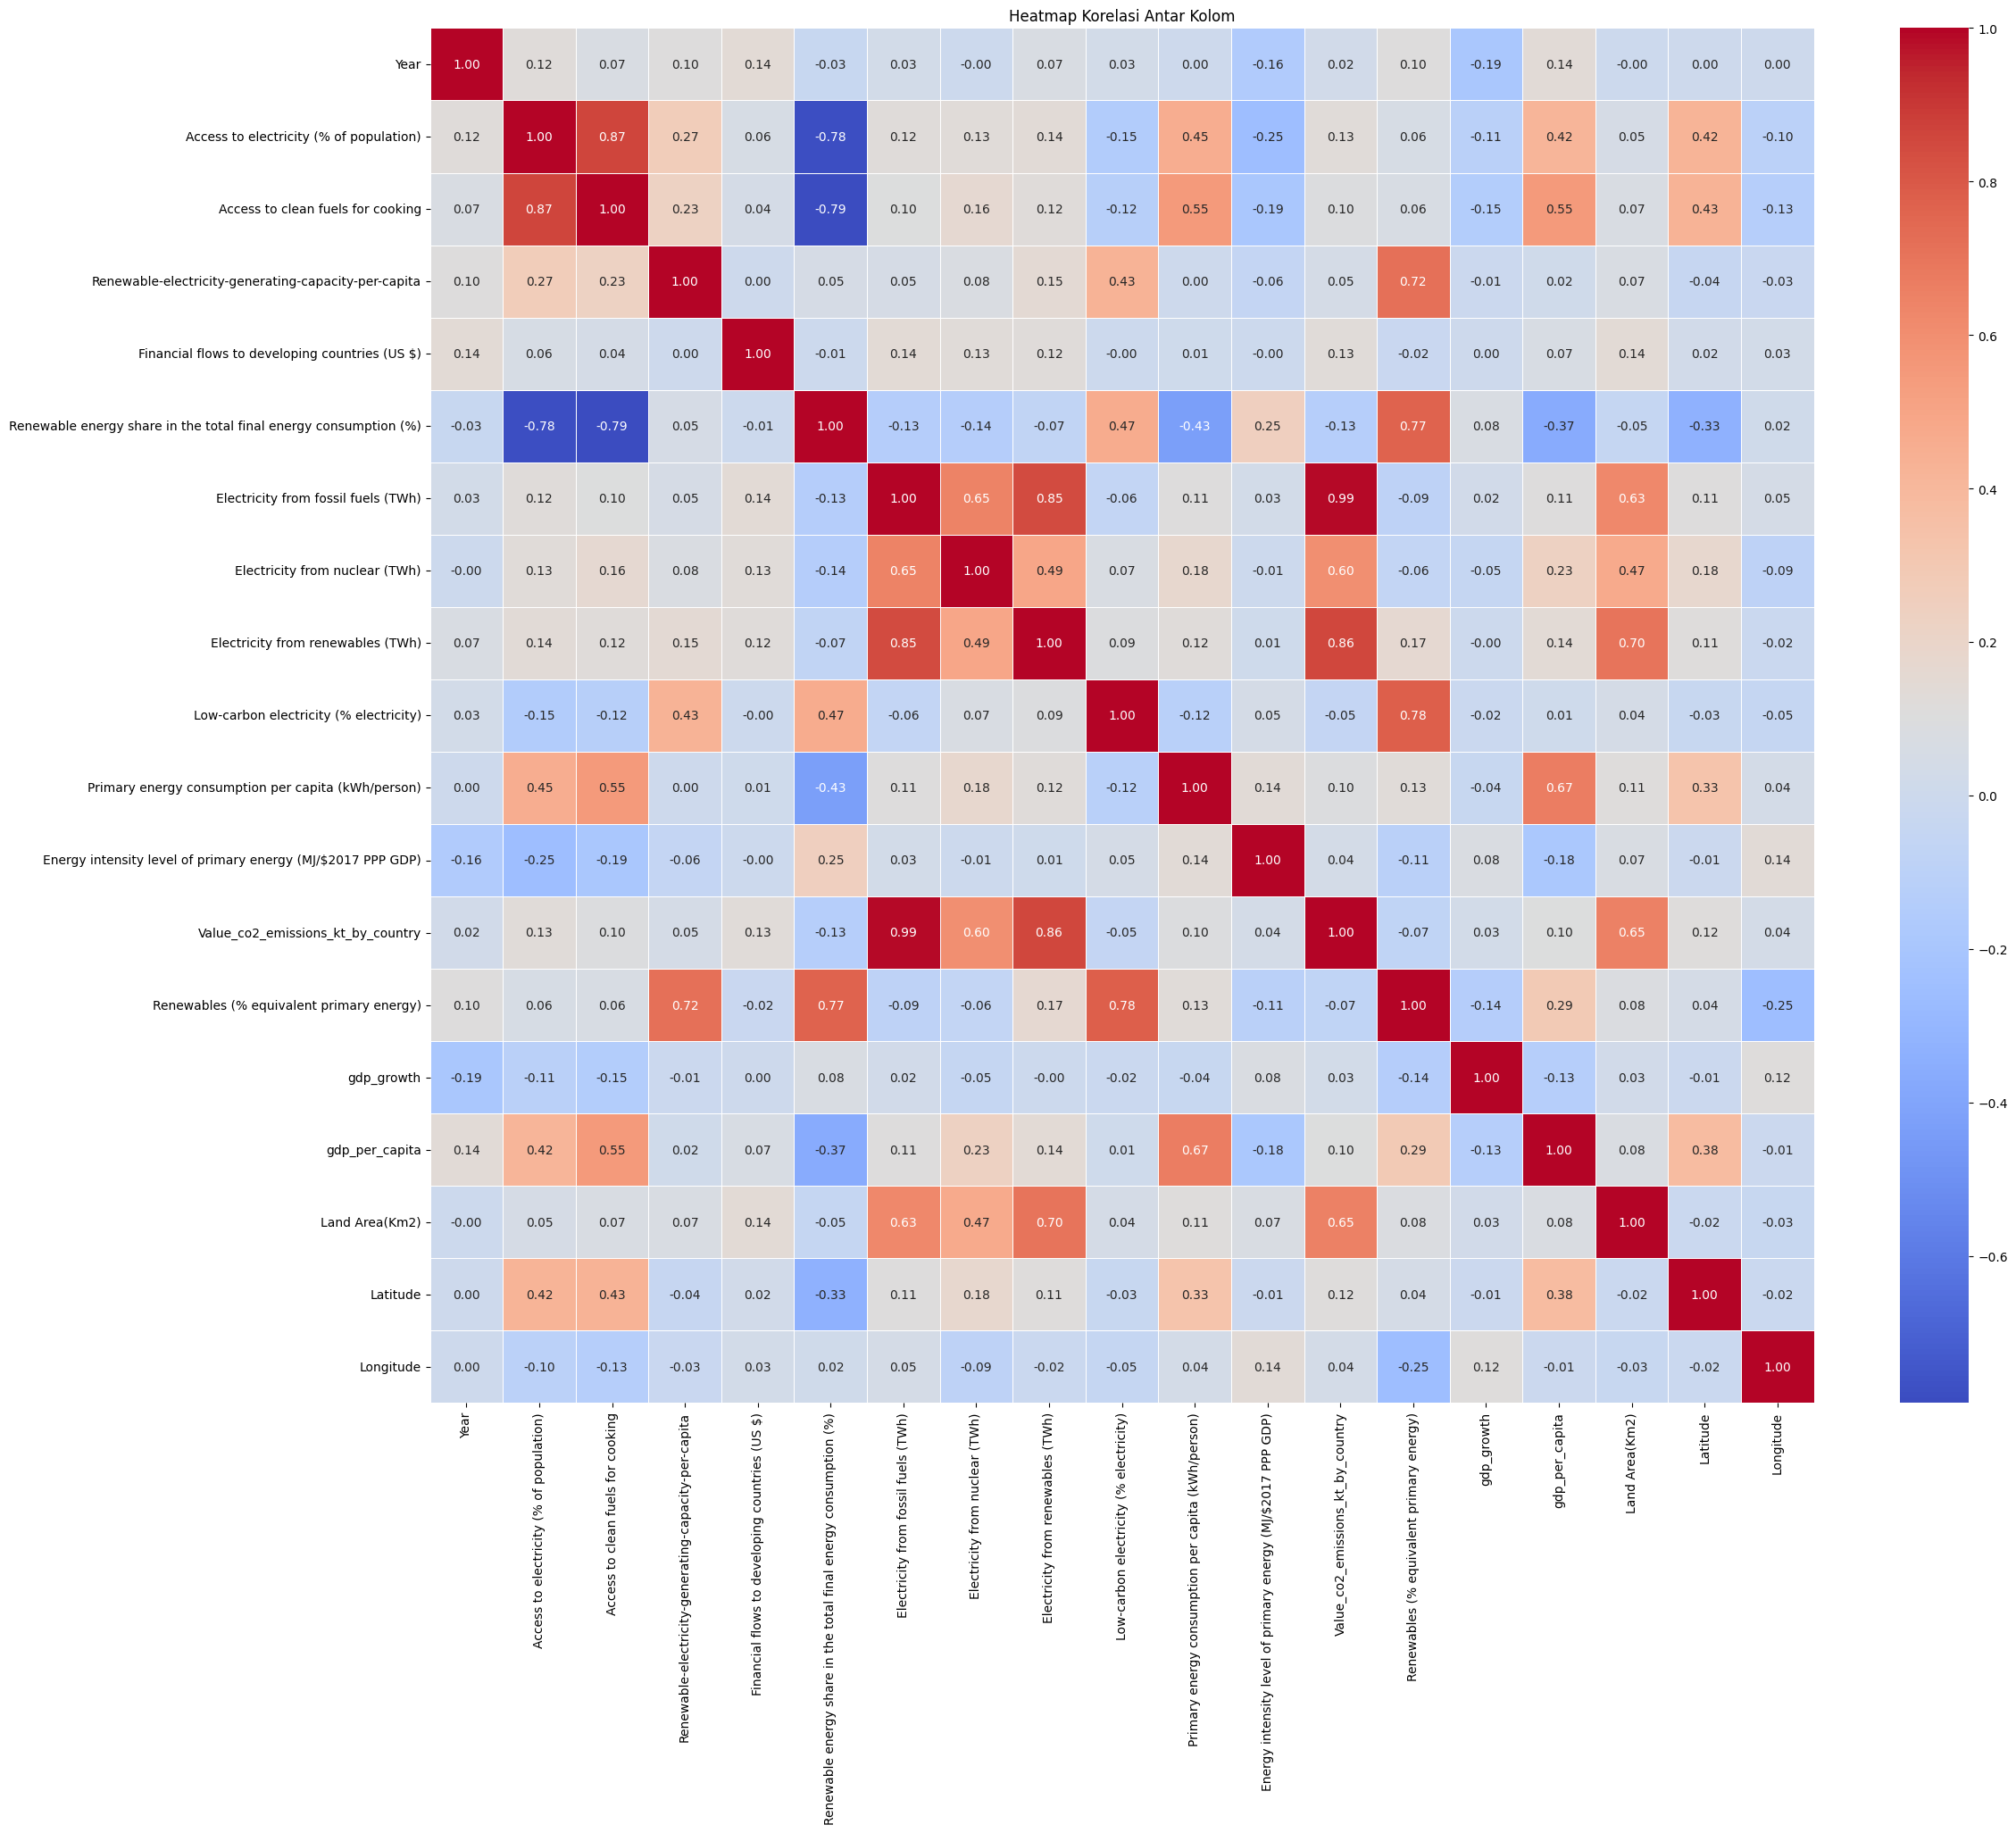

In [ ]:
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

In [ ]:
#mengecek data duplicated
duplicate_rows = df[df.duplicated()]
print("Jumlah Data Duplikat:", len(duplicate_rows))

Jumlah Data Duplikat: 0


In [ ]:
#mengganti nama kolom
df = df.rename(columns = {"Density\\n(P/Km2)":"Density (P/km2)",
                  "Value_co2_emissions_kt_by_country":"CO2 emissions value by country (kT)",
                  "Access to clean fuels for cooking":"Access to clean fuels for cooking (% of population)",
                  "gdp_growth":"GDP growth",
                  "gdp_per_capita":"GDP per capita",
                  "Renewable-electricity-generating-capacity-per-capita":"Renewable electricity Generating Capacity per capita"
                  })

In [ ]:
df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),Renewables (% equivalent primary energy),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [ ]:
#mengkonversi ke tipe data numerik.
df['Density (P/km2)'] = df['Density (P/km2)'].str.replace(',', '')

In [ ]:
#mengubah type data ojc ke tipe data numeric
df['Density (P/km2)'] = pd.to_numeric(df['Density (P/km2)'])

In [ ]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking (% of population)                 float64
Renewable electricity Generating Capacity per capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2 emission

In [ ]:
#mengecek missing value
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking (% of population)                  169
Renewable electricity Generating Capacity per capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
CO2 emissions value by country (kT)                

In [ ]:
#menghapus fitur yang tidak perlu
df = df.drop(['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'], axis=1)

In [ ]:
#mengganti missingvalue
median1 = df['Access to electricity (% of population)'].median()
df['Access to electricity (% of population)'].fillna(median1, inplace=True)

median2 = df['Access to clean fuels for cooking (% of population)'].median()
df['Access to clean fuels for cooking (% of population)'].fillna(median2, inplace=True)

median3 = df['Renewable electricity Generating Capacity per capita'].median()
df['Renewable electricity Generating Capacity per capita'].fillna(median3, inplace=True)

median4 = df['Renewable energy share in the total final energy consumption (%)'].median()
df['Renewable energy share in the total final energy consumption (%)'].fillna(median4, inplace=True)

median5 = df['Electricity from fossil fuels (TWh)'].median()
df['Electricity from fossil fuels (TWh)'].fillna(median5, inplace=True)

median6 = df['Electricity from nuclear (TWh)'].median()
df['Electricity from nuclear (TWh)'].fillna(median6, inplace=True)

median7 = df['Electricity from renewables (TWh)'].median()
df['Electricity from renewables (TWh)'].fillna(median7, inplace=True)

median8 = df['Low-carbon electricity (% electricity)'].median()
df['Low-carbon electricity (% electricity)'].fillna(median7, inplace=True)

median9 = df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].median()
df['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(median9, inplace=True)

median10 = df['CO2 emissions value by country (kT)'].median()
df['CO2 emissions value by country (kT)'].fillna(median10, inplace=True)

median11 = df['GDP growth'].median()
df['GDP growth'].fillna(median11, inplace=True)

median12  = df['GDP per capita'].median()
df['GDP per capita'].fillna(2, inplace=True)

median13 = df['Land Area(Km2)'].median()
df['Land Area(Km2)'].fillna(median13, inplace=True)

median14 = df['Density (P/km2)'].median()
df['Density (P/km2)'].fillna(median14, inplace=True)

median16 = df['Latitude'].median()
df['Latitude'].fillna(median16, inplace=True)

median17 = df['Longitude'].median()
df['Longitude'].fillna(median17, inplace=True)
print(df)

           Entity  Year  Access to electricity (% of population)  \
0     Afghanistan  2000                                 1.613591   
1     Afghanistan  2001                                 4.074574   
2     Afghanistan  2002                                 9.409158   
3     Afghanistan  2003                                14.738506   
4     Afghanistan  2004                                20.064968   
...           ...   ...                                      ...   
3644     Zimbabwe  2016                                42.561730   
3645     Zimbabwe  2017                                44.178635   
3646     Zimbabwe  2018                                45.572647   
3647     Zimbabwe  2019                                46.781475   
3648     Zimbabwe  2020                                52.747670   

      Access to clean fuels for cooking (% of population)  \
0                                                   6.2     
1                                                   7.2     


In [ ]:
#mengecek missing value
df.isnull().sum()

Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking (% of population)                 0
Renewable electricity Generating Capacity per capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
CO2 emissions value by country (kT)                                 0
GDP growth                                                          0
GDP per capita      

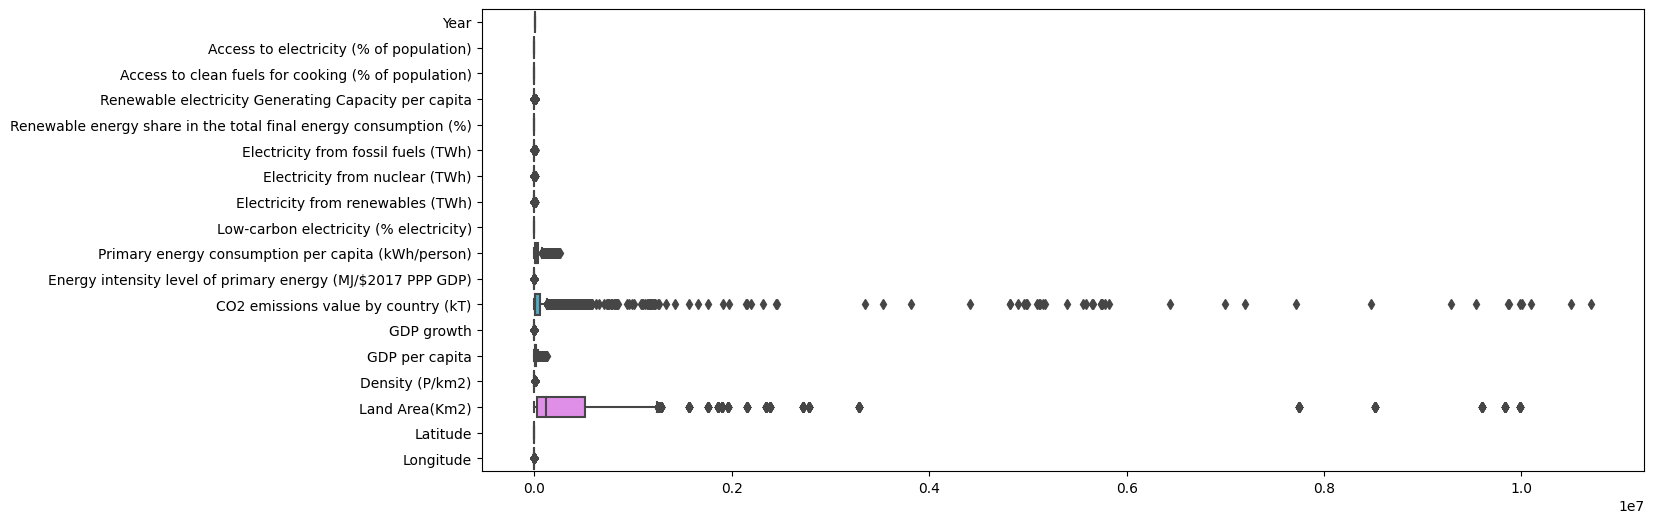

In [ ]:
#mendeteksi outlier
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient="h")
plt.show()

In [ ]:
# Tentukan batas atas dan batas bawah (gunakan metode IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-23-711c3f590f39>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-23-711c3f590f39>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [ ]:
outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-24-9d7370cc9ce2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 7 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            2284 non-null   object 
 1   Year                                                              2284 non-null   int64  
 2   Access to electricity (% of population)                           2284 non-null   float64
 3   Access to clean fuels for cooking (% of population)               2284 non-null   float64
 4   Renewable electricity Generating Capacity per capita              2284 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  2284 non-null   float64
 6   Electricity from fossil fuels (TWh)                               2284 non-null   float64
 7   Electricity from nuclear (TWh)   

In [ ]:
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            1365 non-null   object 
 1   Year                                                              1365 non-null   int64  
 2   Access to electricity (% of population)                           1365 non-null   float64
 3   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 4   Renewable electricity Generating Capacity per capita              1365 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 6   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 7   Electricity from nuclear (TWh)   

<ipython-input-26-f3c28e6d0a19>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            1365 non-null   object 
 1   Year                                                              1365 non-null   int64  
 2   Access to electricity (% of population)                           1365 non-null   float64
 3   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 4   Renewable electricity Generating Capacity per capita              1365 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 6   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 7   Electricity from nuclear (TWh)   

In [ ]:
df_csv = pd.DataFrame(df_clean)
df_csv.to_csv('/content/drive/MyDrive/dataset energi/data_clean.csv', index =False)

Exploratory Data Analyst(EDA)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

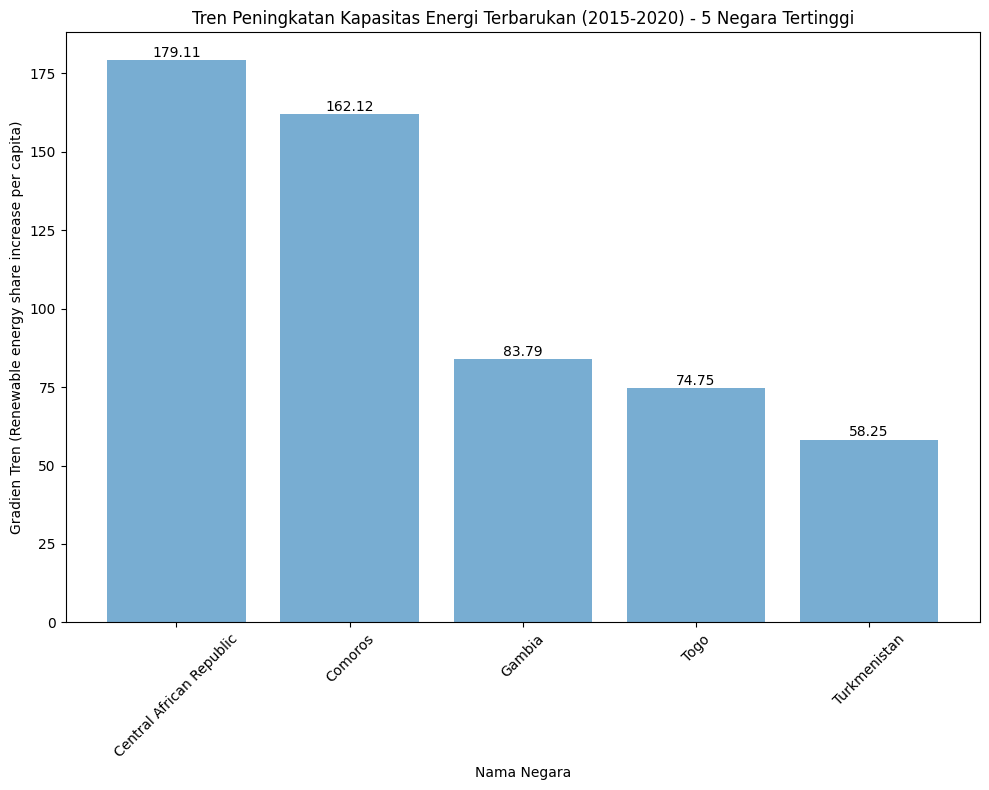

In [ ]:
# Filter data berdasarkan rentang tahun 2015 sampai 2020
df_filtered = df_clean[(df_clean['Year'] >= 2015) & (df_clean['Year'] <= 2020)]

# Menghitung tren regresi linear untuk setiap negara
trends = {}
for country in df_filtered['Entity'].unique():
    country_data = df_filtered[df_filtered['Entity'] == country]
    renewable_capacity = country_data['Renewable electricity Generating Capacity per capita']
    renewable_share = country_data['Renewable energy share in the total final energy consumption (%)']

    coefficients = np.polyfit(renewable_capacity, renewable_share, 1)
    trends[country] = coefficients[0]  # Simpan koefisien regresi (gradien) sebagai tren

# Ambil lima negara dengan tren tertinggi
top_5_countries = sorted(trends, key=trends.get, reverse=True)[:5]

# Mengambil nilai gradien tren untuk lima negara tertinggi
top_5_trends = [trends[country] for country in top_5_countries]

# Plot histogram untuk lima negara tertinggi
plt.figure(figsize=(10, 8))
bars = plt.bar(top_5_countries, top_5_trends, alpha=0.6)

# Menambahkan persentase peningkatan di atas setiap bar
for bar, trend in zip(bars, top_5_trends):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             f'{trend:.2f}', ha='center', va='bottom')

# Memberi label sumbu dan judul plot
plt.xlabel('Nama Negara')
plt.ylabel('Gradien Tren (Renewable energy share increase per capita)')
plt.title('Tren Peningkatan Kapasitas Energi Terbarukan (2015-2020) - 5 Negara Tertinggi')

# Menampilkan plot
plt.xticks(rotation=45)  # Rotasi label sumbu x untuk keterbacaan yang lebih baik
plt.tight_layout()
plt.show()


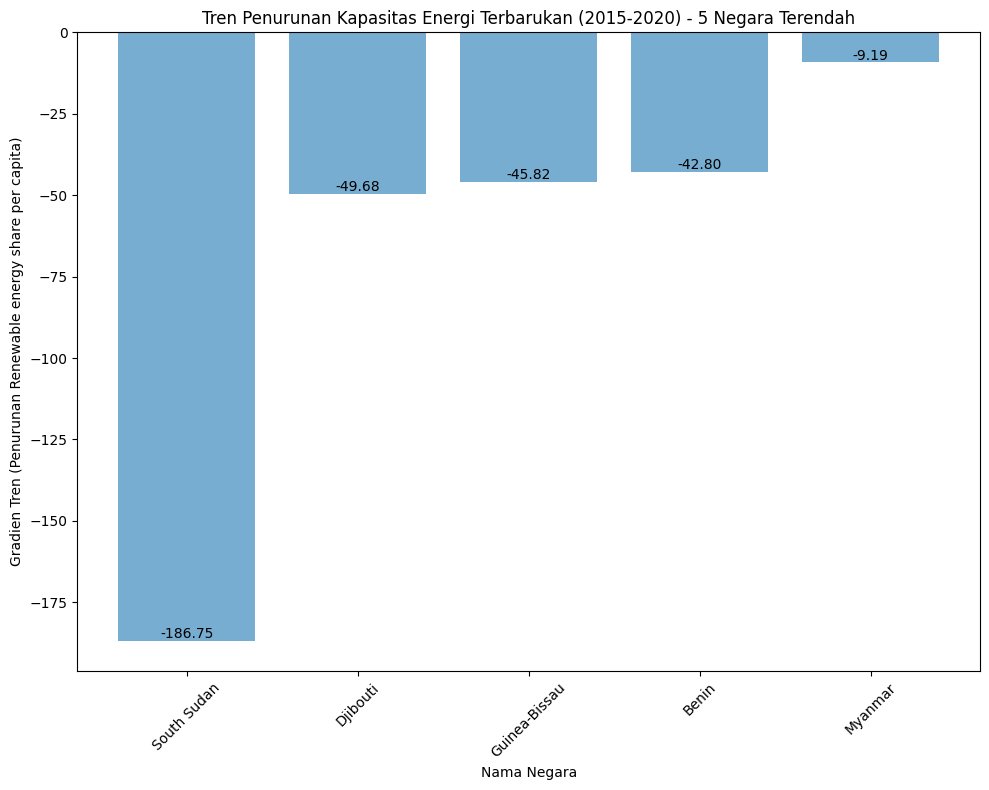

In [ ]:
# Ambil lima negara dengan tren terendah
bottom_5_countries = sorted(trends, key=trends.get)[:5]

# Mengambil nilai gradien tren untuk lima negara terendah
bottom_5_trends = [trends[country] for country in bottom_5_countries]

# Plot histogram untuk lima negara terendah
plt.figure(figsize=(10, 8))
bars = plt.bar(bottom_5_countries, bottom_5_trends, alpha=0.6)

# Menambahkan persentase penurunan di atas setiap bar
for bar, trend in zip(bars, bottom_5_trends):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             f'{trend:.2f}', ha='center', va='bottom')

# Memberi label sumbu dan judul plot
plt.xlabel('Nama Negara')
plt.ylabel('Gradien Tren (Penurunan Renewable energy share per capita)')
plt.title('Tren Penurunan Kapasitas Energi Terbarukan (2015-2020) - 5 Negara Terendah')

# Menampilkan plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

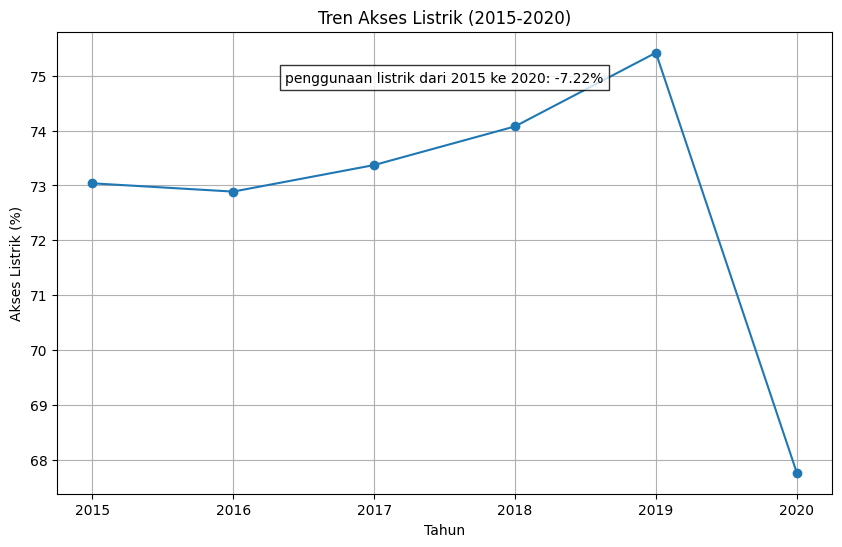

In [ ]:
# Filter DataFrame untuk data dari tahun 2015 sampai 2020
df_filtered = df_clean[(df_clean['Year'] >= 2015) & (df_clean['Year'] <= 2020)]

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata akses listrik untuk setiap tahun
mean_access_by_year = df_filtered.groupby('Year')['Access to electricity (% of population)'].mean()

# Membuat plot garis untuk menampilkan tren akses listrik dari tahun 2015 hingga 2020
plt.figure(figsize=(10, 6))
plt.plot(mean_access_by_year.index, mean_access_by_year.values, marker='o', linestyle='-')
plt.title('Tren Akses Listrik (2015-2020)')
plt.xlabel('Tahun')
plt.ylabel('Akses Listrik (%)')

# Menampilkan label tahun pada sumbu x
plt.xticks(mean_access_by_year.index)

# Menambahkan label untuk kenaikan persentase dari 2015 ke 2020
initial_value = mean_access_by_year[2015]
final_value = mean_access_by_year[2020]
increase = final_value - initial_value
percentage_increase = (increase / initial_value) * 100

# Menampilkan kenaikan persentase sebagai teks pada grafik
plt.text(0.5, 0.9, f'penggunaan listrik dari 2015 ke 2020: {percentage_increase:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()

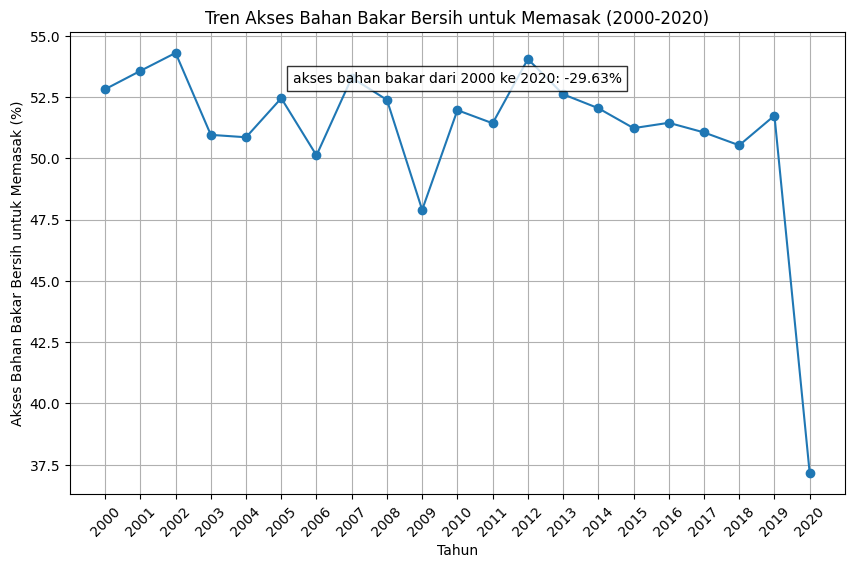

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame untuk data dari tahun 2000 sampai 2020
df_filtered = df_clean[(df_clean['Year'] >= 2000) & (df_clean['Year'] <= 2020)]

# Mengelompokkan data berdasarkan tahun dan menghitung rata-rata akses bahan bakar bersih untuk memasak untuk setiap tahun
mean_clean_fuel_by_year = df_filtered.groupby('Year')['Access to clean fuels for cooking (% of population)'].mean()

# Membuat plot garis untuk menampilkan tren akses bahan bakar bersih untuk memasak dari tahun 2000 hingga 2020
plt.figure(figsize=(10, 6))
plt.plot(mean_clean_fuel_by_year.index, mean_clean_fuel_by_year.values, marker='o', linestyle='-')
plt.title('Tren Akses Bahan Bakar Bersih untuk Memasak (2000-2020)')
plt.xlabel('Tahun')
plt.ylabel('Akses Bahan Bakar Bersih untuk Memasak (%)')

# Menampilkan label tahun pada sumbu x
plt.xticks(mean_clean_fuel_by_year.index, rotation=45)  # Rotasi label agar mudah dibaca

# Menambahkan label untuk kenaikan persentase dari 2000 ke 2020
initial_value = mean_clean_fuel_by_year[2000]
final_value = mean_clean_fuel_by_year[2020]
increase = final_value - initial_value
percentage_increase = (increase / initial_value) * 100


plt.text(0.5, 0.9, f'akses bahan bakar dari 2000 ke 2020: {percentage_increase:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()


In [ ]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_clean['Continent'] = df_clean['Entity'].apply(country_to_continent)
df_clean.head(10)

<ipython-input-33-7126fe9f34b2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Continent'] = df_clean['Entity'].apply(country_to_continent)


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable electricity Generating Capacity per capita,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2 emissions value by country (kT),GDP growth,GDP per capita,Density (P/km2),Land Area(Km2),Latitude,Longitude,Continent
0,Afghanistan,2000,1.613591,6.20,9.22,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.559855,2.000000,60.0,652230.0,33.93911,67.709953,Asia
1,Afghanistan,2001,4.074574,7.20,8.86,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.559855,2.000000,60.0,652230.0,33.93911,67.709953,Asia
2,Afghanistan,2002,9.409158,8.20,8.47,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.559855,179.426579,60.0,652230.0,33.93911,67.709953,Asia
3,Afghanistan,2003,14.738506,9.50,8.09,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,Asia
4,Afghanistan,2004,20.064968,10.90,7.75,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,Asia
5,Afghanistan,2005,25.390894,12.20,7.51,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,11.229715,242.031313,60.0,652230.0,33.93911,67.709953,Asia
6,Afghanistan,2006,30.718690,13.85,7.40,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,5.357403,263.733602,60.0,652230.0,33.93911,67.709953,Asia
8,Afghanistan,2008,42.400000,16.70,7.49,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,3.924984,364.663542,60.0,652230.0,33.93911,67.709953,Asia
11,Afghanistan,2011,43.222020,21.80,8.13,12.61,0.18,0.0,0.60,76.923090,1436.11430,3.23,8930.000305,0.426355,591.190030,60.0,652230.0,33.93911,67.709953,Asia
13,Afghanistan,2013,68.290650,24.80,9.10,16.86,0.22,0.0,0.89,80.180176,1060.79260,2.46,5989.999771,5.600745,624.315454,60.0,652230.0,33.93911,67.709953,Asia


<ipython-input-34-c5d0c972bdb3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_continent_df = df_clean.groupby(['Year', 'Continent']).mean().reset_index()


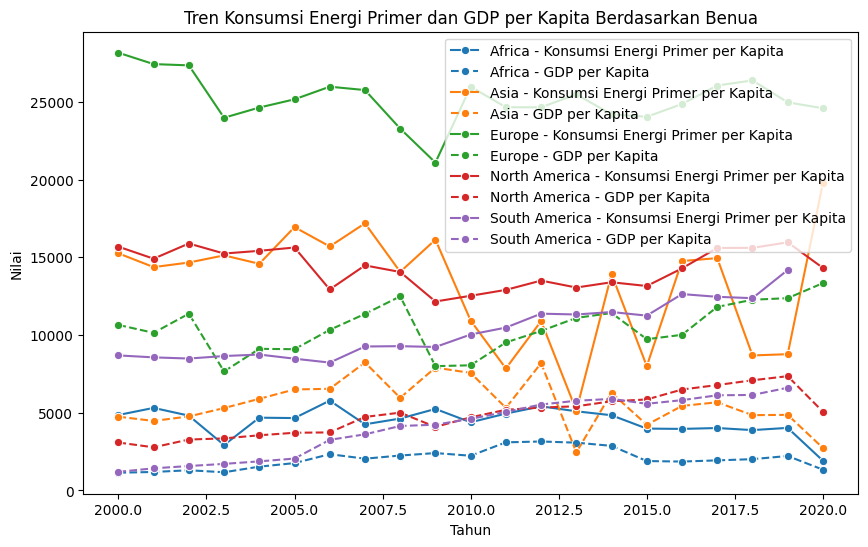

In [ ]:
# Agregasi data berdasarkan tahun dan benua
aggregated_continent_df = df_clean.groupby(['Year', 'Continent']).mean().reset_index()

# Membuat plot tren untuk setiap benua
plt.figure(figsize=(10, 6))

continents = aggregated_continent_df['Continent'].unique()
colors = sns.color_palette('tab10', n_colors=len(continents))

for i, continent in enumerate(continents):
    data = aggregated_continent_df[aggregated_continent_df['Continent'] == continent]
    sns.lineplot(data=data, x='Year', y='Primary energy consumption per capita (kWh/person)',
                 marker='o', label=f'{continent} - Konsumsi Energi Primer per Kapita', color=colors[i])
    sns.lineplot(data=data, x='Year', y='GDP per capita',
                 marker='o', label=f'{continent} - GDP per Kapita', color=colors[i], linestyle='dashed')

plt.title('Tren Konsumsi Energi Primer dan GDP per Kapita Berdasarkan Benua')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()
plt.show()

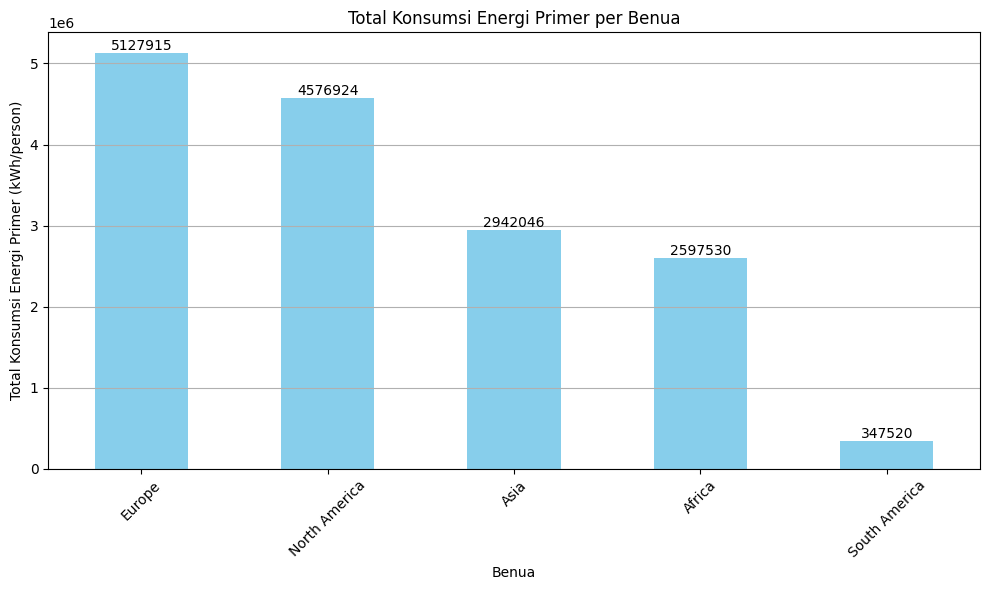

In [ ]:
# Menghitung total konsumsi energi primer per benua
total_energy_per_continent = df_clean.groupby('Continent')['Primary energy consumption per capita (kWh/person)'].sum().sort_values(ascending=False)

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
total_energy_per_continent.plot(kind='bar', color='skyblue')
plt.title('Total Konsumsi Energi Primer per Benua')
plt.xlabel('Benua')
plt.ylabel('Total Konsumsi Energi Primer (kWh/person)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Menampilkan nilai di atas tiap batang diagram
for i, value in enumerate(total_energy_per_continent):
    plt.text(i, value + 50, f'{value:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_all = pd.DataFrame(columns=columns)

# Creating a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df_clean[(df_clean['Year'] == year) & (df_clean['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Primary energy consumption per capita (kWh/person)'
data_to_concat = []

for year in range(2000, 2021):
    row_data = filter_and_calculate_mean(df_clean, year, column_name)
    data_to_concat.append(row_data)

df_energy_all = pd.concat([df_energy_all, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_all['Year'] = df_energy_all['Year'].astype('int64')

# Displaying the df_energy_all table for review
display(df_energy_all)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,15257.053611,28160.942500,4856.609625,15685.745371,8689.00900,NaN
1,2001,14369.642959,27429.089100,5312.676666,14910.687435,8563.69350,NaN
2,2002,14664.245265,27347.855900,4815.417733,15888.448133,8488.75525,NaN
3,2003,15123.876661,23978.046750,2926.740494,15242.943628,8648.71200,NaN
4,2004,14583.811580,24634.439000,4683.602452,15416.930274,8745.63950,NaN
5,2005,16942.154672,25163.504000,4658.806741,15629.992467,8478.19400,NaN
6,2006,15698.017905,25975.712375,5781.858308,12931.872460,8228.09015,NaN
7,2007,17186.135495,25758.501545,4257.322816,14479.995782,9263.26500,NaN
8,2008,14063.581997,23279.814700,4627.687245,14056.165224,9284.60650,NaN
9,2009,16133.334261,21093.387333,5246.060088,12156.815712,9230.95075,NaN


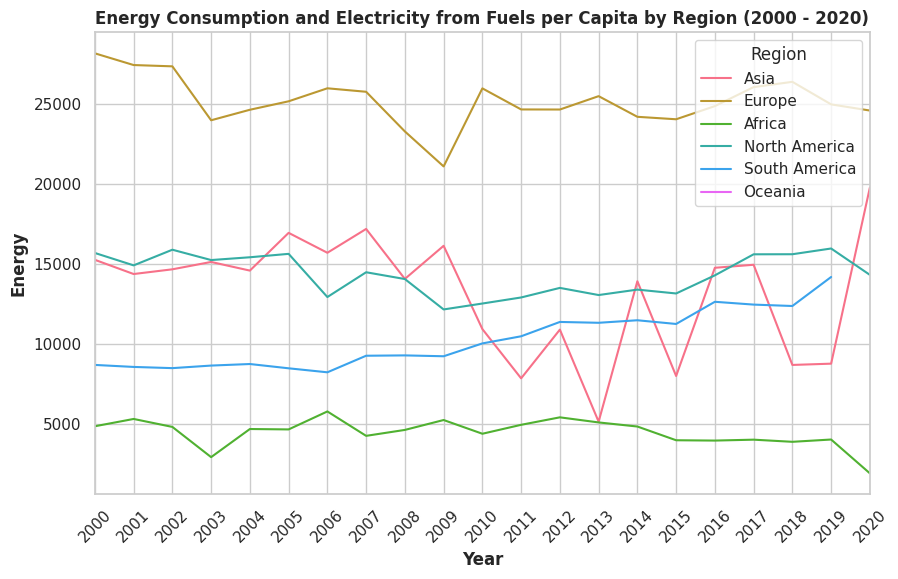

In [ ]:
# Melt the DataFrame
df_energy_cons_melted = pd.melt(df_energy_all, id_vars='Year', var_name='Region', value_name='Energy Source')

# Rename specific values in the 'Energy Source' column
df_energy_cons_melted['Energy Source'] = df_energy_cons_melted['Energy Source'].replace({
    'Energy Consumption': 'Energy Consumption (kWh/person)',
    'Electricity from Fuels': 'Electricity from Fuels (kWh/person)'
})

# Building a graph
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df_energy_cons_melted['Region'].unique()))

plot = sns.lineplot(data=df_energy_cons_melted, x='Year', y='Energy Source', hue='Region', palette=palette)
# Adding names to the graph
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Energy', fontweight='bold')  # Update the y-axis label
plt.title('Energy Consumption and Electricity from Fuels per Capita by Region (2000 - 2020)', fontweight='bold')
plt.legend(title='Region')
plt.margins(x=0)


# Adjust the placement of captions on the x-axis and change the date format
years = range(2000, 2021)
plot.set_xticks(years)
plot.set_xticklabels([str(year) for year in years], rotation=45)

plt.show()

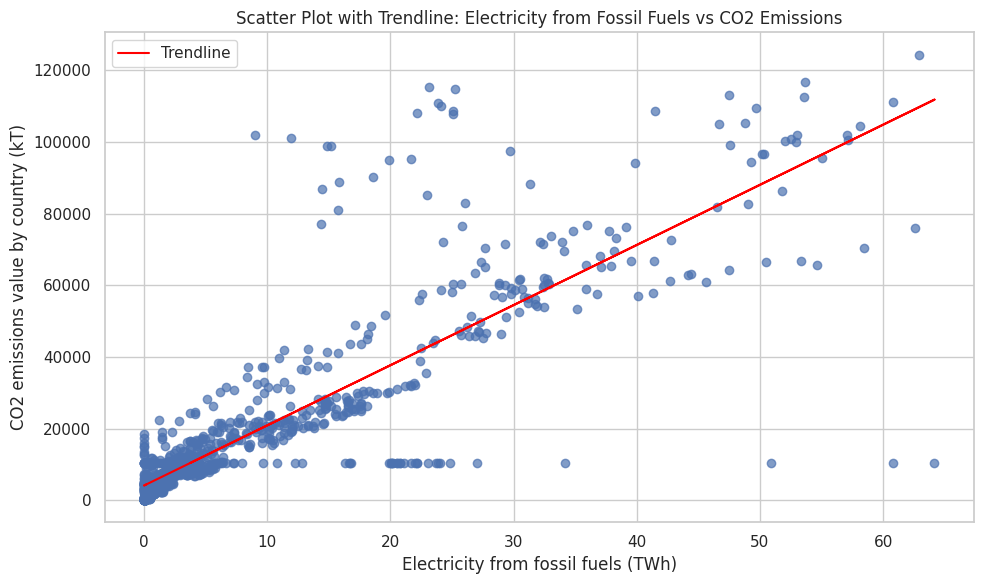

In [ ]:
# Ensure the columns exist and there are no NaN values
required_columns = ['Electricity from fossil fuels (TWh)', 'CO2 emissions value by country (kT)', 'Entity']
if not all(col in df_clean.columns for col in required_columns):
    print("Required columns are missing in the DataFrame.")
else:
    # Remove rows with missing values in required columns
    df_clean = df_clean.dropna(subset=required_columns)

    # Calculate trendline / regression line
    x = df_clean['Electricity from fossil fuels (TWh)']
    y = df_clean['CO2 emissions value by country (kT)']
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(x)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7)
    plt.plot(x, trendline, color='red', label='Trendline')

    plt.title('Scatter Plot with Trendline: Electricity from Fossil Fuels vs CO2 Emissions')
    plt.xlabel('Electricity from fossil fuels (TWh)')
    plt.ylabel('CO2 emissions value by country (kT)')

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-39-4bd8b2874111>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_co2_by_continent = co2_emissions_data.groupby(['Continent', 'Year']).sum().reset_index()


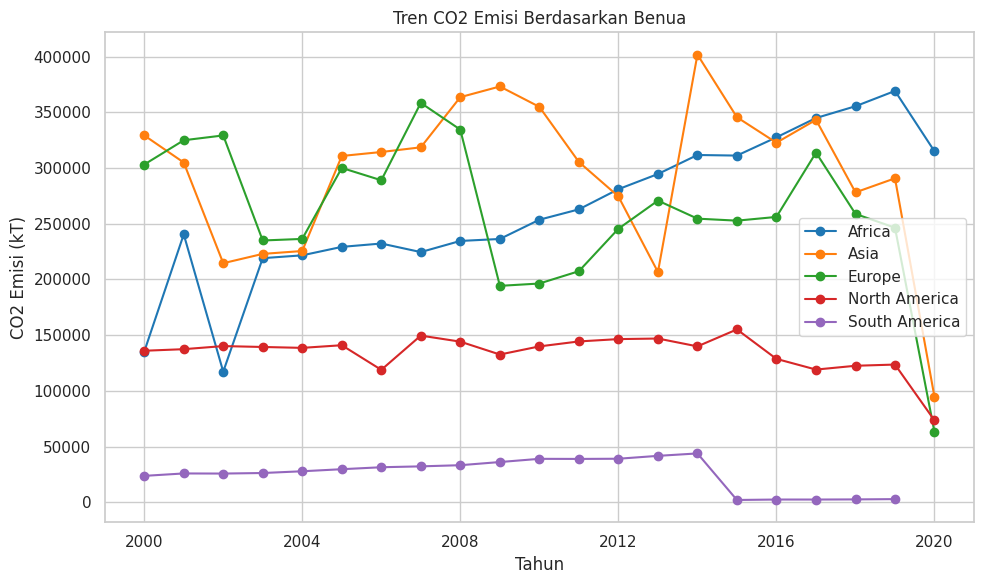

In [ ]:
# Mengganti nama kolom untuk mempermudah pemrosesan
co2_emissions_data = df_clean.rename(columns={'CO2 emissions value by country (kT)': 'CO2_emissions'})

# Agregasi CO2 emissions berdasarkan benua dan tahun
aggregated_co2_by_continent = co2_emissions_data.groupby(['Continent', 'Year']).sum().reset_index()

# Konversi kolom 'Year' ke tipe data datetime jika belum dalam format tersebut
aggregated_co2_by_continent['Year'] = pd.to_datetime(aggregated_co2_by_continent['Year'], format='%Y')

# Membuat plot tren CO2 emisi berdasarkan benua
plt.figure(figsize=(10, 6))

continents = aggregated_co2_by_continent['Continent'].unique()
colors = plt.cm.tab10.colors[:len(continents)]

for continent, color in zip(continents, colors):
    continent_data = aggregated_co2_by_continent[aggregated_co2_by_continent['Continent'] == continent]
    plt.plot(continent_data['Year'], continent_data['CO2_emissions'],
             marker='o', label=continent, color=color)

plt.title('Tren CO2 Emisi Berdasarkan Benua')
plt.xlabel('Tahun')
plt.ylabel('CO2 Emisi (kT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

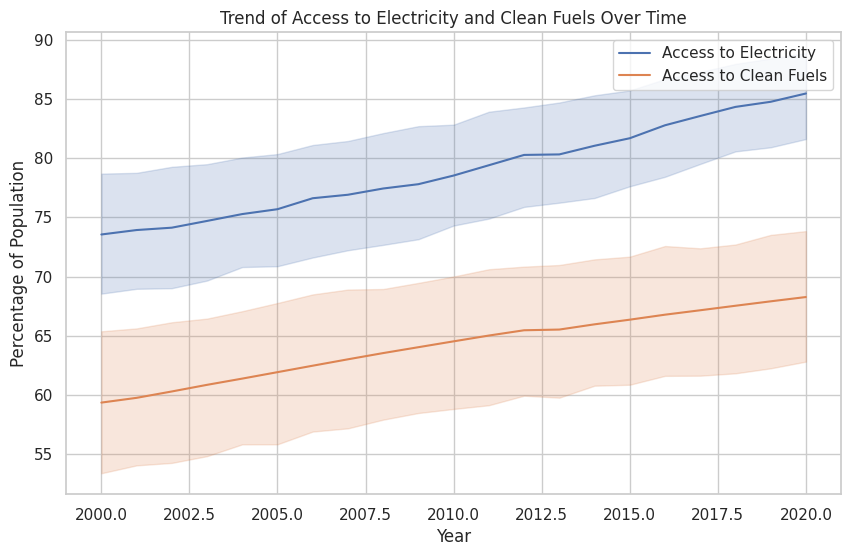

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Access to electricity (% of population)', label='Access to Electricity')
sns.lineplot(data=df, x='Year', y='Access to clean fuels for cooking (% of population)', label='Access to Clean Fuels')
plt.title('Trend of Access to Electricity and Clean Fuels Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend()
plt.show()

MODELLING

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            1365 non-null   object 
 1   Year                                                              1365 non-null   int64  
 2   Access to electricity (% of population)                           1365 non-null   float64
 3   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 4   Renewable electricity Generating Capacity per capita              1365 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 6   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 7   Electricity from nuclear (TWh)   

In [ ]:
df_clean = df_clean.drop(columns=['Continent'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            1365 non-null   object 
 1   Year                                                              1365 non-null   int64  
 2   Access to electricity (% of population)                           1365 non-null   float64
 3   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 4   Renewable electricity Generating Capacity per capita              1365 non-null   float64
 5   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 6   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 7   Electricity from nuclear (TWh)   

In [ ]:
df_clean = df_clean.drop(['Electricity from nuclear (TWh)','Entity','Latitude'], axis=1)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Year                                                              1365 non-null   int64  
 1   Access to electricity (% of population)                           1365 non-null   float64
 2   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 3   Renewable electricity Generating Capacity per capita              1365 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 5   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 6   Electricity from renewables (TWh)                                 1365 non-null   float64
 7   Low-carbon electricity (% electri

In [ ]:
target_correlation = df_clean.corr()['Electricity from fossil fuels (TWh)'].sort_values(ascending=False)
target_correlation

Electricity from fossil fuels (TWh)                                 1.000000
CO2 emissions value by country (kT)                                 0.863359
Electricity from renewables (TWh)                                   0.453243
GDP per capita                                                      0.426606
Access to electricity (% of population)                             0.409275
Access to clean fuels for cooking (% of population)                 0.396384
Primary energy consumption per capita (kWh/person)                  0.374199
Longitude                                                           0.171161
Renewable electricity Generating Capacity per capita                0.100917
Density (P/km2)                                                     0.094709
Land Area(Km2)                                                      0.015163
Year                                                               -0.003687
GDP growth                                                         -0.044209

In [ ]:
threshold = 0.3
columns = target_correlation[abs(target_correlation)<=threshold].index
df_cleaned = df_clean.drop(columns=columns)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 0 to 3646
Data columns (total 8 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Access to electricity (% of population)                           1365 non-null   float64
 1   Access to clean fuels for cooking (% of population)               1365 non-null   float64
 2   Renewable energy share in the total final energy consumption (%)  1365 non-null   float64
 3   Electricity from fossil fuels (TWh)                               1365 non-null   float64
 4   Electricity from renewables (TWh)                                 1365 non-null   float64
 5   Primary energy consumption per capita (kWh/person)                1365 non-null   float64
 6   CO2 emissions value by country (kT)                               1365 non-null   float64
 7   GDP per capita                    

In [ ]:
df_cleaned

,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),CO2 emissions value by country (kT),GDP per capita
0,1.613591,6.2,44.99,0.16,0.31,302.59482,760.000000,2.000000
1,4.074574,7.2,45.60,0.09,0.50,236.89185,730.000000,2.000000
2,9.409158,8.2,37.83,0.13,0.56,210.86215,1029.999971,179.426579
3,14.738506,9.5,36.66,0.31,0.63,229.96822,1220.000029,190.683814
4,20.064968,10.9,44.24,0.33,0.56,204.23125,1029.999971,211.382074
...,...,...,...,...,...,...,...,...
3627,44.524475,10.4,23.30,2.00,13.10,3099.08300,10500.000000,985.132436
3628,33.654890,33.5,69.26,3.30,3.44,4919.52250,13700.000000,563.057504
3629,34.172844,33.6,71.53,4.33,3.25,4614.95750,13900.000000,568.386290
3645,44.178635,29.8,82.46,3.05,4.30,3068.01150,10340.000150,1235.189032


In [ ]:
# Memisahkan kolom target
X = df_cleaned.drop('Electricity from fossil fuels (TWh)', axis=1) #feature untuk dimasukkan ke model semua variabel
y = df_cleaned['Electricity from fossil fuels (TWh)'] # target

In [ ]:
data_scaler= StandardScaler()
X_scaled= data_scaler.fit_transform(X)
X= pd.DataFrame(X_scaled,columns=X.columns)

In [ ]:
X

,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),CO2 emissions value by country (kT),GDP per capita
0,-2.198293,-1.148345,0.207224,-0.534350,-0.807848,-0.641664,-0.698087
1,-2.119203,-1.122876,0.227671,-0.483990,-0.812621,-0.643014,-0.698087
2,-1.947762,-1.097408,-0.032780,-0.468086,-0.814512,-0.629519,-0.671067
3,-1.776490,-1.064298,-0.071998,-0.449532,-0.813124,-0.620972,-0.669353
4,-1.605310,-1.028642,0.182084,-0.468086,-0.814994,-0.629519,-0.666201
...,...,...,...,...,...,...,...
1360,-0.819241,-1.041376,-0.519826,2.855697,-0.604689,-0.203535,-0.548370
1361,-1.168563,-0.453044,1.020755,0.295271,-0.472439,-0.059591,-0.612646
1362,-1.151917,-0.450497,1.096845,0.244910,-0.494565,-0.050595,-0.611834
1363,-0.830356,-0.547279,1.463219,0.523218,-0.606947,-0.210732,-0.510290


In [ ]:
y

0       0.16
1       0.09
2       0.13
3       0.31
4       0.33
        ... 
3627    2.00
3628    3.30
3629    4.33
3645    3.05
3646    3.73
Name: Electricity from fossil fuels (TWh), Length: 1365, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
SEED = 42
TARGET = 'Electricity from fossil fuels (TWh)'
FEATURES = df_cleaned.columns.drop(TARGET)

NUMERICAL = df_cleaned[FEATURES].select_dtypes('number').columns
print(f"Numerical features: {', '.join(NUMERICAL)}")

Numerical features: Access to electricity (% of population), Access to clean fuels for cooking (% of population), Renewable energy share in the total final energy consumption (%), Electricity from renewables (TWh), Primary energy consumption per capita (kWh/person), CO2 emissions value by country (kT), GDP per capita


In [ ]:
# Preprocessor untuk data numerik
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ColumnTransformer untuk memproses fitur-fitur numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL)
    ])

# Pipeline dengan RandomForestRegressor dan preprocessor
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf_model', RandomForestRegressor(random_state=42))
])

# Parameter grid untuk pencarian grid RandomForestRegressor
rf_param_grid = {
    'rf_model__n_estimators': [50, 100, 200],
    'rf_model__max_depth': [3, 5, None],
    'rf_model__min_samples_split': [2, 5, 10]
}

# Melakukan GridSearchCV untuk RandomForestRegressor
rf_grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari grid search
best_rf_pipeline = rf_grid_search.best_estimator_

# Melatih model terbaik
best_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'CO2 emissions value by country (kT)', 'GDP per capita'],
      dtype='object'))])),
                ('rf_model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [ ]:
# Membuat preprocessor
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL)
    ])

# Buat pipeline dengan GradientBoosting
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Menambahkan preprocessor ke dalam pipeline
    ('gb_model', GradientBoostingRegressor(random_state=42))  # Gunakan default params di sini
])

# Parameter grid untuk GradientBoostingRegressor
gb_param_grid = {
    'gb_model__n_estimators': [50, 100, 200],
    'gb_model__max_depth': [3, 5, 7],
    'gb_model__learning_rate': [0.01, 0.1, 0.2]
}

# Melakukan GridSearchCV untuk GradientBoosting
gb_grid_search = GridSearchCV(estimator=gb_pipeline, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari grid search
best_gb_pipeline = gb_grid_search.best_estimator_
best_params = gb_grid_search.best_params_

# Melatih model
best_gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'CO2 emissions value by country (kT)', 'GDP per capita'],
      dtype='object'))])),
                ('gb_model',
                 GradientBoostingRegressor(max_depth=5, n_estimators=200,
                                           random_state=42))])

In [ ]:
# Membuat preprocessor
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL)
    ])

# Buat pipeline dengan ExtraTree Regressor
et_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Menambahkan preprocessor ke dalam pipeline
    ('et_model', ExtraTreesRegressor(random_state=42))  # Gunakan default params di sini
])

# Parameter grid untuk ExtraTreesRegressor
et_param_grid = {
    'et_model__n_estimators': [50, 100, 200],
    'et_model__max_depth': [3, 5, None],
    'et_model__min_samples_split': [2, 5, 10],
    'et_model__min_samples_leaf': [1, 2, 4]
}

# Melakukan GridSearchCV untuk ExtraTree Regressor
et_grid_search = GridSearchCV(estimator=et_pipeline, param_grid=et_param_grid, scoring='neg_mean_squared_error', cv=5)
et_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari grid search
best_et_pipeline = et_grid_search.best_estimator_
best_params = et_grid_search.best_params_

# Melatih model
best_et_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'CO2 emissions value by country (kT)', 'GDP per capita'],
      dtype='object'))])),
                ('et_model',
                 ExtraTreesRegressor(min_samples_split=5, n_estimators=200,
                                     random_state=42))])

In [ ]:
# Membuat preprocessor
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, NUMERICAL)
    ])

# Buat pipeline dengan Decision Tree Regressor
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Menambahkan preprocessor ke dalam pipeline
    ('dt_model', DecisionTreeRegressor(random_state=42))  # Gunakan default params di sini
])

# Parameter grid untuk DecisionTreeRegressor
dt_param_grid = {
    'dt_model__max_depth': [3, 5, 7, None],
    'dt_model__min_samples_split': [2, 5, 10],
    'dt_model__min_samples_leaf': [1, 2, 4]
}

# Melakukan GridSearchCV untuk Decision Tree Regressor
dt_grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik dari grid search
best_dt_pipeline = dt_grid_search.best_estimator_
best_params = dt_grid_search.best_params_

# Melatih model
best_dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking (% of population)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from renewables (TWh)',
       'Primary energy consumption per capita (kWh/person)',
       'CO2 emissions value by country (kT)', 'GDP per capita'],
      dtype='object'))])),
                ('dt_model',
                 DecisionTreeRegressor(max_depth=7, random_state=42))])

In [ ]:
# Prediksi dari masing-masing model
pred_rf = best_rf_pipeline.predict(X_test)
pred_gb = best_gb_pipeline.predict(X_test)
pred_et = best_et_pipeline.predict(X_test)
pred_dt = best_dt_pipeline.predict(X_test)

In [ ]:
# Membuat DataFrame dengan prediksi dari masing-masing model
df_predictions = pd.DataFrame({
    'RandomForest_Prediction': pred_rf,
    'GradientBoosting_Prediction': pred_gb,
    'ExtraTrees_Prediction': pred_et,
    'DecisionTree_Prediction': pred_dt,
})

# Menampilkan DataFrame dengan prediksi dari masing-masing model
# Menggabungkan hasil prediksi dengan data testing (X_test)
combined_data = pd.concat([X_test.reset_index(drop=True), df_predictions], axis=1)

# Prediksi nilai aktual menggunakan model yang telah di-fit sebelumnya
actual_values = y_test

# Menampilkan DataFrame dengan prediksi dari masing-masing model beserta nilai aktual
combined_data_df = pd.DataFrame(combined_data)

# Menambahkan nilai aktual ke dalam DataFrame hasil prediksi
combined_data_df['Actual_Values'] = actual_values.reset_index(drop=True)

# Menampilkan DataFrame dengan prediksi dari masing-masing model beserta nilai aktual
display(combined_data_df)

,Access to electricity (% of population),Access to clean fuels for cooking (% of population),Renewable energy share in the total final energy consumption (%),Electricity from renewables (TWh),Primary energy consumption per capita (kWh/person),CO2 emissions value by country (kT),GDP per capita,RandomForest_Prediction,GradientBoosting_Prediction,ExtraTrees_Prediction,DecisionTree_Prediction,Actual_Values
0,0.963607,1.240638,-0.523513,3.263881,1.138951,1.880952,3.085536,32.46565,31.387824,33.374100,31.931667,30.84
1,0.693652,1.174419,-0.927429,0.340330,-0.369480,1.964170,-0.215387,24.94785,24.460415,24.231742,29.756250,24.13
2,-0.678864,-1.275690,0.828350,-0.616517,-0.749074,-0.669104,-0.536805,0.03925,0.035119,0.040363,0.042727,0.04
3,-0.922173,-0.203449,-0.239598,-0.539651,-0.634578,-0.529208,-0.464350,0.86055,1.040040,0.882242,0.646210,0.92
4,-0.623363,-1.126697,1.572159,0.507314,-0.720508,-0.320489,-0.628201,1.83535,1.318827,1.729092,1.532976,2.19
...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.523781,1.128575,-1.106091,-0.608565,-0.169025,-0.203535,-0.698087,0.09405,0.110455,0.093283,1.532976,0.10
269,0.950752,1.189700,-0.942514,1.397897,-0.301866,2.539495,-0.205747,33.86140,28.194367,29.018454,37.693529,32.38
270,0.099776,1.036887,-0.800053,-0.343511,-0.507295,1.009642,-0.482680,14.41080,13.813846,14.157000,15.172857,14.13
271,-0.328041,-0.740843,1.339865,0.533820,-0.700102,-0.267410,-0.483172,2.97325,2.307932,3.013196,1.532976,2.58


In [ ]:
# Membuat DataFrame dengan prediksi dari masing-masing model
df_predictions = pd.DataFrame({
    'RandomForest_Prediction': pred_rf,
    'GradientBoosting_Prediction': pred_gb,
    'ExtraTrees_Prediction': pred_et,
    'DecisionTree_Prediction': pred_dt,
})

# Prediksi nilai aktual menggunakan model yang telah di-fit sebelumnya
actual_values = y_test

# Menggabungkan nilai aktual dengan prediksi dari masing-masing model
combined_predictions = pd.concat([df_predictions.reset_index(drop=True), actual_values.reset_index(drop=True)], axis=1)

# Menampilkan DataFrame dengan prediksi dari masing-masing model beserta nilai aktual
display(combined_predictions)

,RandomForest_Prediction,GradientBoosting_Prediction,ExtraTrees_Prediction,DecisionTree_Prediction,Electricity from fossil fuels (TWh)
0,32.46565,31.387824,33.374100,31.931667,30.84
1,24.94785,24.460415,24.231742,29.756250,24.13
2,0.03925,0.035119,0.040363,0.042727,0.04
3,0.86055,1.040040,0.882242,0.646210,0.92
4,1.83535,1.318827,1.729092,1.532976,2.19
...,...,...,...,...,...
268,0.09405,0.110455,0.093283,1.532976,0.10
269,33.86140,28.194367,29.018454,37.693529,32.38
270,14.41080,13.813846,14.157000,15.172857,14.13
271,2.97325,2.307932,3.013196,1.532976,2.58


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Menghitung MSE
mse_random_forest = mean_squared_error(y_test, pred_rf)
mse_gradient_boosting = mean_squared_error(y_test, pred_gb)
mse_extra_tree = mean_squared_error(y_test, pred_et)
mse_decision_tree = mean_squared_error(y_test, pred_dt)

# Menghitung RMSE (Root Mean Squared Error)
rmse_random_forest = np.sqrt(mse_random_forest)
rmse_gradient_boosting = np.sqrt(mse_gradient_boosting)
rmse_extra_tree = np.sqrt(mse_extra_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)

# Menghitung MAE
mae_random_forest = mean_absolute_error(y_test, pred_rf)
mae_gradient_boosting = mean_absolute_error(y_test, pred_gb)
mae_extra_tree = mean_absolute_error(y_test, pred_et)
mae_decision_tree = mean_absolute_error(y_test, pred_dt)

# Menghitung R-squared (R2)
r2_random_forest = r2_score(y_test, pred_rf)
r2_gradient_boosting = r2_score(y_test, pred_gb)
r2_extra_tree = r2_score(y_test, pred_et)
r2_decision_tree = r2_score(y_test, pred_dt)


In [ ]:
# Membuat DataFrame
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Extra Tree Regression', 'Decision Tree Regression'],
    'MSE': [mse_random_forest, mse_gradient_boosting, mse_extra_tree, mse_decision_tree],
    'MAE': [mae_random_forest, mae_gradient_boosting, mae_extra_tree, mae_decision_tree],
    'R2 Score': [r2_random_forest, r2_gradient_boosting, r2_extra_tree, r2_decision_tree],
    'RMSE': [rmse_random_forest, rmse_gradient_boosting, rmse_extra_tree, rmse_decision_tree]
}

df_hasil = pd.DataFrame(data)

print(df_hasil)

                      Model        MSE       MAE  R2 Score      RMSE
0             Random Forest   6.623396  0.810628  0.957529  2.573596
1         Gradient Boosting   4.386702  0.875327  0.971871  2.094446
2     Extra Tree Regression   3.064039  0.686837  0.980352  1.750440
3  Decision Tree Regression  14.672345  1.441283  0.905916  3.830450


In [ ]:
df_hasil['RMSE'].sort_values(ascending = True)

2    1.750440
1    2.094446
0    2.573596
3    3.830450
Name: RMSE, dtype: float64

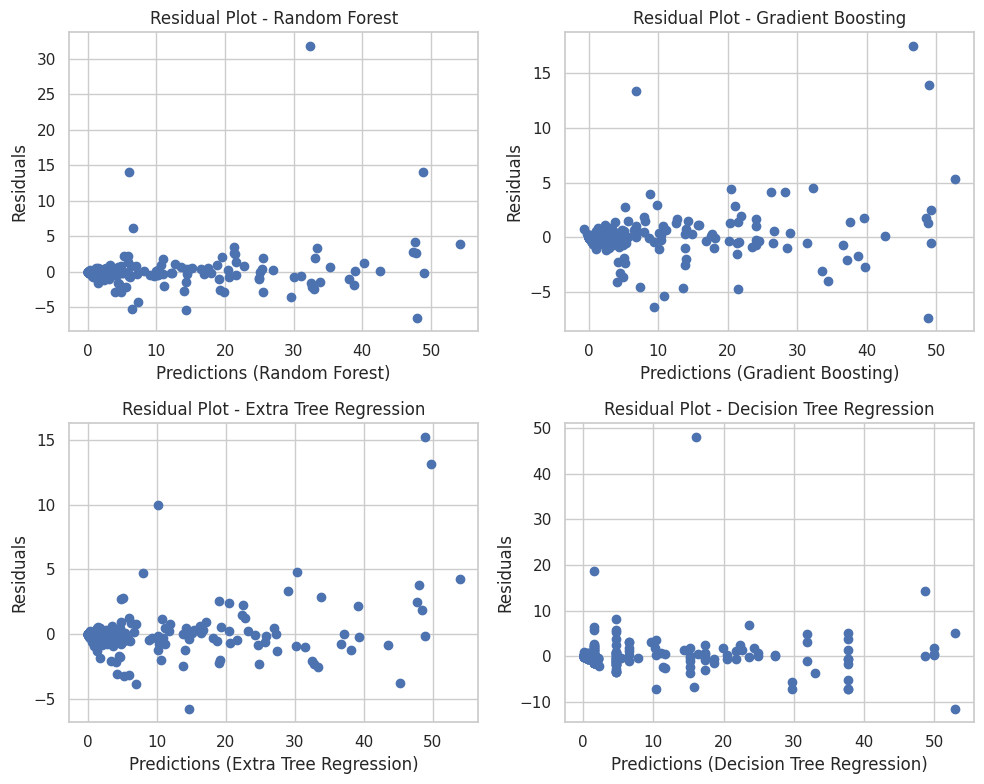

In [ ]:
# Hitung residual untuk setiap model
residuals_rf = y_test - pred_rf
residuals_gb = y_test - pred_gb
residuals_et = y_test - pred_et
residuals_dt = y_test - pred_dt

# Buat plot residual untuk masing-masing model
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(pred_rf, residuals_rf)
plt.xlabel('Predictions (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Random Forest')

plt.subplot(2, 2, 2)
plt.scatter(pred_gb, residuals_gb)
plt.xlabel('Predictions (Gradient Boosting)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Gradient Boosting')

plt.subplot(2, 2, 3)
plt.scatter(pred_et, residuals_et)
plt.xlabel('Predictions (Extra Tree Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Extra Tree Regression')

plt.subplot(2, 2, 4)
plt.scatter(pred_dt, residuals_dt)
plt.xlabel('Predictions (Decision Tree Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot - Decision Tree Regression')

plt.tight_layout()
plt.show()

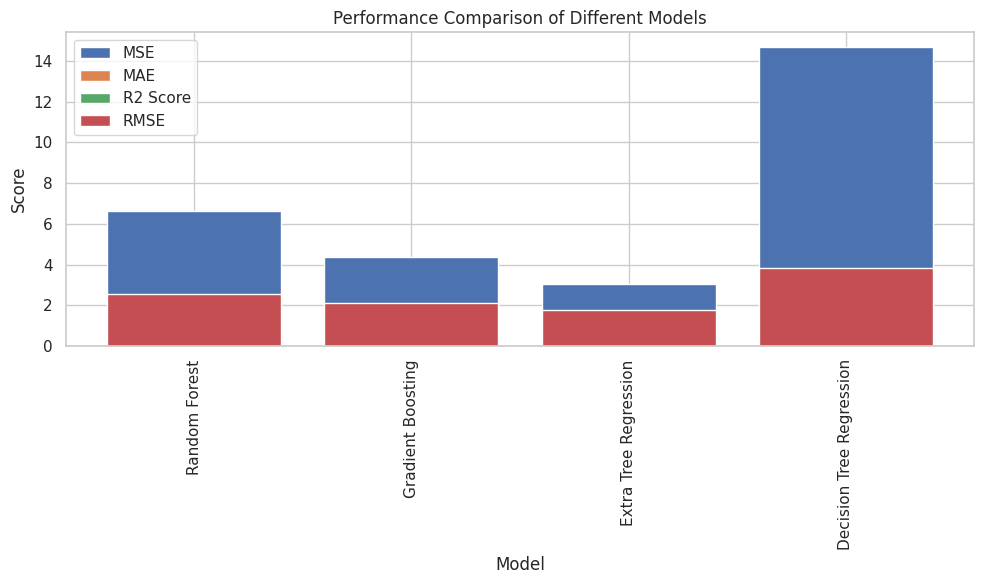

In [ ]:
# Membuat visualisasi dengan menggunakan grafik bar
metrics = ['MSE', 'MAE', 'R2 Score', 'RMSE']

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.bar(df_hasil['Model'], df_hasil[metric], label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Comparison of Different Models')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

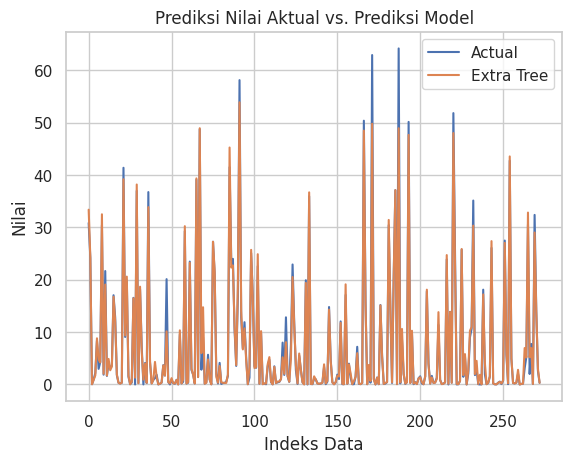

In [ ]:
# Membuat plot garis
plt.plot(combined_data_df.index, combined_data_df['Actual_Values'], label='Actual')
plt.plot(combined_data_df.index, combined_data_df['ExtraTrees_Prediction'], label='Extra Tree')

# Menambahkan judul dan label sumbu
plt.title('Prediksi Nilai Aktual vs. Prediksi Model')
plt.xlabel('Indeks Data')
plt.ylabel('Nilai')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

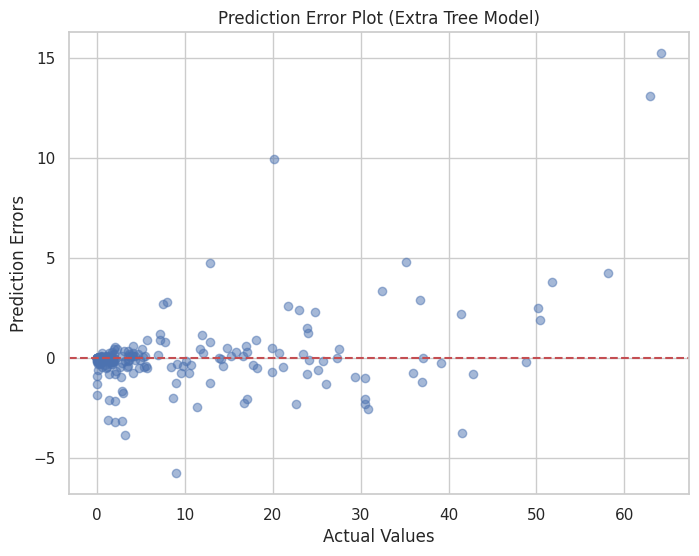

In [ ]:
# Prediksi menggunakan model Gradient Boosting pada data uji
pred_et = best_et_pipeline.predict(X_test)

# Hitung kesalahan prediksi
prediction_errors = y_test - pred_et

# Plot prediction error
plt.figure(figsize=(8, 6))
plt.scatter(y_test, prediction_errors, alpha=0.5)
plt.title('Prediction Error Plot (Extra Tree Model)')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.axhline(y=0, color='r', linestyle='--')  # Garis untuk menunjukkan error nol
plt.show()

In [ ]:
# Mendapatkan model terbaik dari grid search
best_et_model = best_et_pipeline.named_steps['et_model']

# Mendapatkan preprocessor untuk fitur numerik
preprocessor_for_numerical = best_et_pipeline.named_steps['preprocessor']

# Mendapatkan nama kolom fitur numerik setelah preprocessing
numerical_features_list = preprocessor_for_numerical.named_transformers_['num'].named_steps['scaler'].get_feature_names_out(NUMERICAL)

# Mendapatkan fitur penting (feature importance)
feature_importance = best_et_model.feature_importances_

# Menyusun fitur penting ke dalam sebuah DataFrame
feature_importance_df = pd.DataFrame({'Feature': numerical_features_list, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan atau menggunakan fitur penting sesuai kebutuhan
print(feature_importance_df)


                                             Feature  Importance
5                CO2 emissions value by country (kT)    0.753765
6                                     GDP per capita    0.046877
0            Access to electricity (% of population)    0.045512
3                  Electricity from renewables (TWh)    0.043428
1  Access to clean fuels for cooking (% of popula...    0.038363
4  Primary energy consumption per capita (kWh/per...    0.037006
2  Renewable energy share in the total final ener...    0.035049


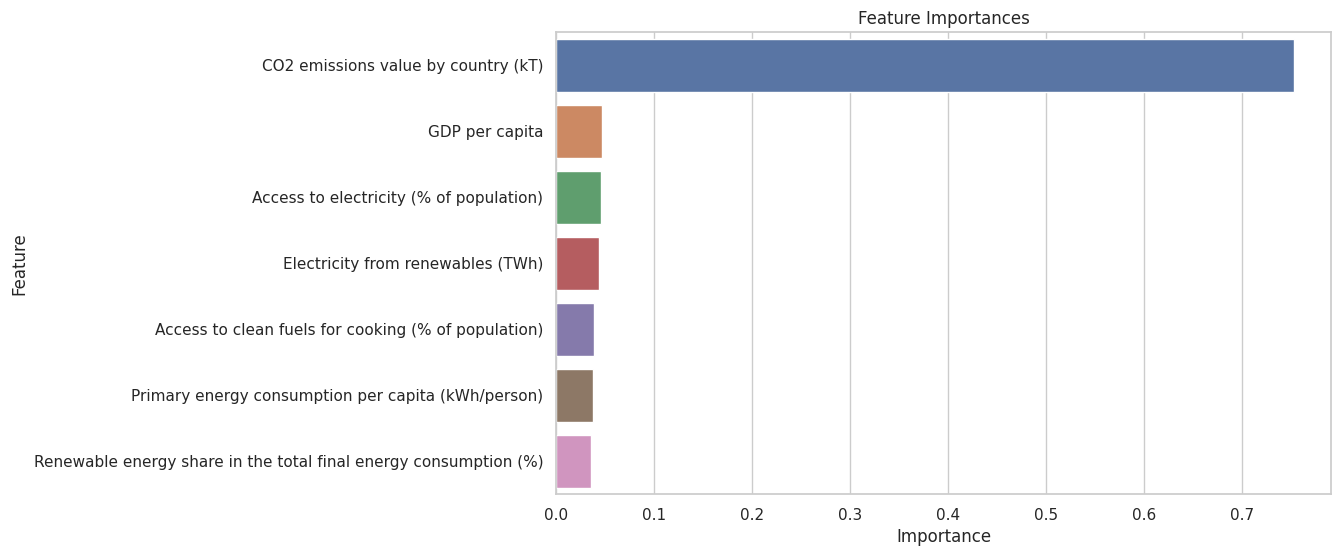

In [ ]:
# Memvisualisasikan fitur penting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()